<a href="https://colab.research.google.com/github/Rosie-Ping/Aggie-Hackathon/blob/main/Covid_Mobility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal

#Import Data and Data Exploratory

In [ ]:
#Import data from Google Cloud Platform
mobility = pd.read_csv("https://storage.googleapis.com/aggie-hacks-us-covid19/Mobility_US")
case = pd.read_csv("https://storage.googleapis.com/aggie-hacks-us-covid19/Cases_US")

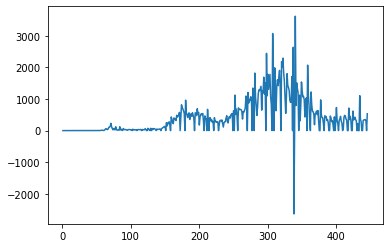

In [ ]:
x = range(0,len(case[case['state']=='ID']))
y = case[case['state']=='ID'].new_confirmed_cases	
plt.plot(x,y)
plt.show()

In [ ]:
new_conf_qt = case[['state','new_confirmed_cases']].groupby('state').quantile(0.98)

f =[]
for i in case['state']:
  f.append(new_conf_qt.loc[i][0])

case['new_confirmed_cases_quantile'] = f

In [ ]:
#remove 2% outliers and negative values
case['new_confirmed_cases_remove_otl']=np.where((case['new_confirmed_cases']< case['new_confirmed_cases_quantile']) & (case['new_confirmed_cases']>=0),case['new_confirmed_cases'],np.nan)
print(case['new_confirmed_cases'].isna().sum())
print(case['new_confirmed_cases_remove_otl'].isna().sum())

51
553


In [ ]:
#rolling average for 7 days
#Group by states
ga = case.groupby('state')['new_confirmed_cases_remove_otl'].rolling(7,min_periods=1).mean()

In [ ]:
case['new_confirmed_cases_moving_avg'] = ga.droplevel(0)

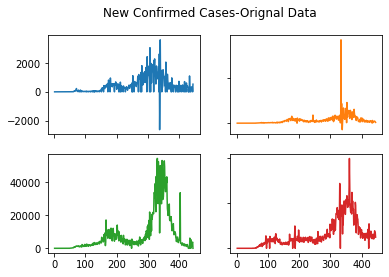

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('New Confirmed Cases-Orignal Data')
ax1.plot(range(0,len(case[case['state']=='ID'])), case[case['state']=='ID'].new_confirmed_cases)
ax2.plot(range(0,len(case[case['state']=='TX'])), case[case['state']=='TX'].new_confirmed_cases, 'tab:orange')
ax3.plot(range(0,len(case[case['state']=='CA'])), case[case['state']=='CA'].new_confirmed_cases, 'tab:green')
ax4.plot(range(0,len(case[case['state']=='VA'])), case[case['state']=='VA'].new_confirmed_cases, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

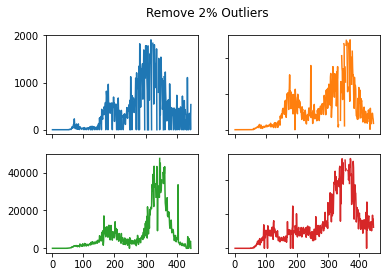

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Remove 2% Outliers')
ax1.plot(range(0,len(case[case['state']=='ID'])), case[case['state']=='ID'].new_confirmed_cases_remove_otl)
ax2.plot(range(0,len(case[case['state']=='TX'])), case[case['state']=='TX'].new_confirmed_cases_remove_otl, 'tab:orange')
ax3.plot(range(0,len(case[case['state']=='CA'])), case[case['state']=='CA'].new_confirmed_cases_remove_otl, 'tab:green')
ax4.plot(range(0,len(case[case['state']=='VA'])), case[case['state']=='VA'].new_confirmed_cases_remove_otl, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
case.pivot_table(index='state',columns='date',values='new_confirmed_cases_moving_avg')

#Median Filter + Rolling Average

In [ ]:
ID = case[case['state']=='ID']

In [ ]:
x = range(0,len(ID))
y = ID.new_confirmed_cases		
y_medfilt_5 = scipy.signal.medfilt(y,5)
y_medfilt_7 = scipy.signal.medfilt(y,7)
y_medfilt_9 = scipy.signal.medfilt(y,9)
y_medfilt_11 = scipy.signal.medfilt(y,11)

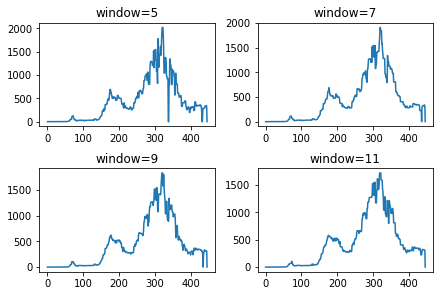

In [ ]:
#constrained_layout adjusts subplots and decorations automatically to fit them in the figure as best as possible

fig,a = plt.subplots(2,2,constrained_layout=True)
a[0][0].plot(x,y_medfilt_5)
a[0][0].set_title('window=5')
a[0][1].plot(x,y_medfilt_7)
a[0][1].set_title('window=7')
a[1][0].plot(x,y_medfilt_9)
a[1][0].set_title('window=9')
a[1][1].plot(x,y_medfilt_11)
a[1][1].set_title('window=11')

plt.show()

In [ ]:
ID['y_medfit'] = y_medfilt_11
ID['y_medfit_rolling'] = ID['y_medfit'].rolling(7,min_periods=1).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


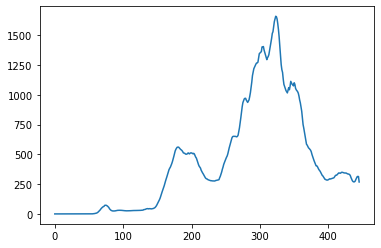

In [ ]:
x = range(0,len(ID))
y = ID['y_medfit_rolling']
plt.plot(x,y)
plt.show()

In [ ]:
#Apply on entire dataset
def medfilt(y,n):
  return scipy.signal.medfilt(y,n)

medfilt = case.groupby('state')['new_confirmed_cases'].transform(medfilt,n=11)

case['medfilt'] = medfilt

In [ ]:

medfilt_rolling = case.groupby('state')['medfilt'].rolling(7,min_period=1).mean()

case['medfilt_rolling'] = medfilt_rolling.droplevel(0)

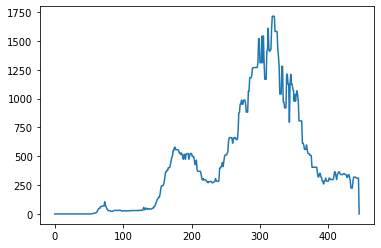

In [ ]:
x = range(0,len(case[case['state']=='ID']))
y = case[case['state']=='ID'].medfilt
plt.plot(x,y)
plt.show()

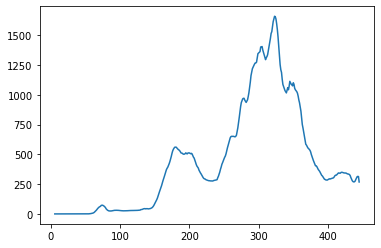

In [ ]:
x = range(0,len(case[case['state']=='ID']))
y = case[case['state']=='ID'].medfilt_rolling
plt.plot(x,y)
plt.show()

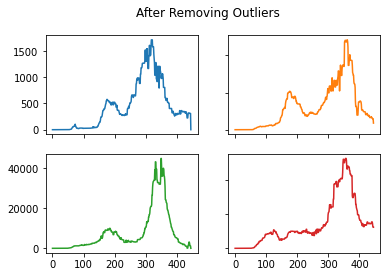

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('After Removing Outliers')
ax1.plot(range(0,len(case[case['state']=='ID'])), case[case['state']=='ID'].medfilt)
ax2.plot(range(0,len(case[case['state']=='TX'])), case[case['state']=='TX'].medfilt, 'tab:orange')
ax3.plot(range(0,len(case[case['state']=='CA'])), case[case['state']=='CA'].medfilt, 'tab:green')
ax4.plot(range(0,len(case[case['state']=='VA'])), case[case['state']=='VA'].medfilt, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

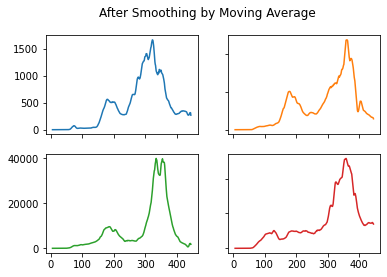

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('After Smoothing by Moving Average')
ax1.plot(range(0,len(case[case['state']=='ID'])), case[case['state']=='ID'].medfilt_rolling)
ax2.plot(range(0,len(case[case['state']=='TX'])), case[case['state']=='TX'].medfilt_rolling, 'tab:orange')
ax3.plot(range(0,len(case[case['state']=='CA'])), case[case['state']=='CA'].medfilt_rolling, 'tab:green')
ax4.plot(range(0,len(case[case['state']=='VA'])), case[case['state']=='VA'].medfilt_rolling, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
mobility

,sub_region_1,date,state_avg_retail_and_recreation,state_avg_grocery_and_pharmacy,state_avg_parks,state_avg_transit_stations,state_avg_workplaces,state_avg_residential
0,Alabama,2020-02-15,5.155172,0.230769,49.571429,5.761905,0.784314,-8.636364e-01
1,Alabama,2020-02-16,-1.454545,-4.015625,-5.476190,2.136364,-1.920000,5.238095e-01
2,Alabama,2020-02-17,-1.169492,-4.476190,12.933333,5.727273,-16.264706,4.333333e+00
3,Alabama,2020-02-18,-4.280702,-5.000000,-12.466667,-0.681818,0.338235,1.435897e+00
4,Alabama,2020-02-19,1.438596,-0.730159,6.666667,3.714286,1.397059,2.081668e-17
...,...,...,...,...,...,...,...,...
21313,Wyoming,2021-04-03,-4.636364,10.400000,64.000000,15.333333,-18.000000,-1.400000e+00
21314,Wyoming,2021-04-04,-26.300000,-14.000000,40.400000,2.444444,-23.714286,-1.000000e+00
21315,Wyoming,2021-04-05,0.500000,6.666667,45.750000,14.222222,-23.818182,1.800000e+00
21316,Wyoming,2021-04-06,-7.636364,0.857143,-4.250000,7.111111,-17.190476,4.600000e+00


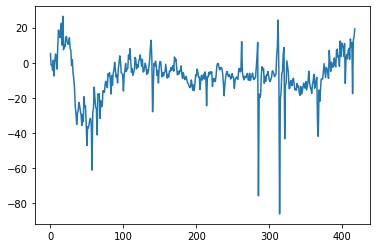

In [ ]:
AL = mobility[mobility['sub_region_1']=='Alabama']

x = range(0,len(AL))
y = AL['state_avg_retail_and_recreation']
plt.plot(x,y)
plt.show()

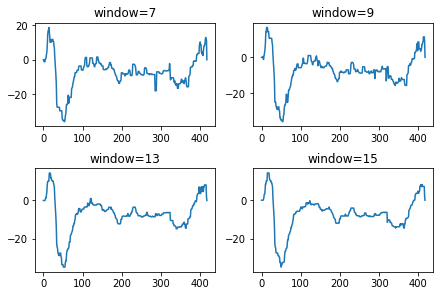

In [ ]:
#Window=13 works well
x = range(0,len(AL))
y = AL['state_avg_retail_and_recreation']		
y_medfilt_7 = scipy.signal.medfilt(y,7)
y_medfilt_9 = scipy.signal.medfilt(y,9)
y_medfilt_13 = scipy.signal.medfilt(y,13)
y_medfilt_15 = scipy.signal.medfilt(y,15)

fig,a = plt.subplots(2,2,constrained_layout=True)
a[0][0].plot(x,y_medfilt_7)
a[0][0].set_title('window=7')
a[0][1].plot(x,y_medfilt_9)
a[0][1].set_title('window=9')
a[1][0].plot(x,y_medfilt_13)
a[1][0].set_title('window=13')
a[1][1].plot(x,y_medfilt_15)
a[1][1].set_title('window=15')

plt.show()

In [ ]:
def medfilt_13(y):
  return scipy.signal.medfilt(y,13)

mobility['retail_and_recreation_medfilt'] = mobility.groupby('sub_region_1')['state_avg_retail_and_recreation'].transform(medfilt_13)
mobility['grocery_and_pharmacy_medfilt'] = mobility.groupby('sub_region_1')['state_avg_grocery_and_pharmacy'].transform(medfilt_13)
mobility['parks_medfilt'] = mobility.groupby('sub_region_1')['state_avg_parks'].transform(medfilt_13)
mobility['transit_stations_medfilt'] = mobility.groupby('sub_region_1')['state_avg_transit_stations'].transform(medfilt_13)
mobility['workplace_medfilt'] = mobility.groupby('sub_region_1')['state_avg_workplaces'].transform(medfilt_13)
mobility['residential_medfilt'] = mobility.groupby('sub_region_1')['state_avg_residential'].transform(medfilt_13)


In [ ]:
mobility['retail_and_recreation'] = mobility.groupby('sub_region_1')['retail_and_recreation_medfilt'].rolling(7,min_period=1).mean().droplevel(0)
mobility['grocery_and_pharmacy'] = mobility.groupby('sub_region_1')['grocery_and_pharmacy_medfilt'].rolling(7,min_period=1).mean().droplevel(0)
mobility['parks'] = mobility.groupby('sub_region_1')['parks_medfilt'].rolling(7,min_period=1).mean().droplevel(0)
mobility['transit_stations']= mobility.groupby('sub_region_1')['transit_stations_medfilt'].rolling(7,min_period=1).mean().droplevel(0)
mobility['workplace'] = mobility.groupby('sub_region_1')['workplace_medfilt'].rolling(7,min_period=1).mean().droplevel(0)
mobility['residential'] = mobility.groupby('sub_region_1')['residential_medfilt'].rolling(7,min_period=1).mean().droplevel(0)

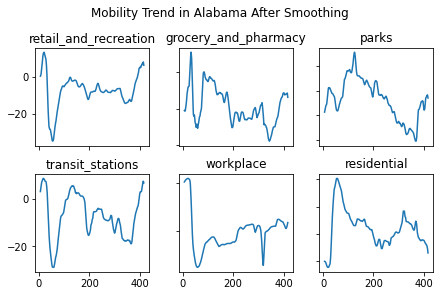

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,constrained_layout=True)
fig.suptitle('Mobility Trend in Alabama After Smoothing')
x = range(0,len(mobility[mobility['sub_region_1']=='Alabama']))
y = mobility[mobility['sub_region_1']=='Alabama']
ax1.plot(x,y['retail_and_recreation'])
ax2.plot(x,y['grocery_and_pharmacy'])
ax3.plot(x,y['parks'])
ax4.plot(x,y['transit_stations'])
ax5.plot(x,y['workplace'])
ax6.plot(x,y['residential'])

ax1.set_title('retail_and_recreation')
ax2.set_title('grocery_and_pharmacy')
ax3.set_title('parks')
ax4.set_title('transit_stations')
ax5.set_title('workplace')
ax6.set_title('residential')

for ax in fig.get_axes():
    ax.label_outer()


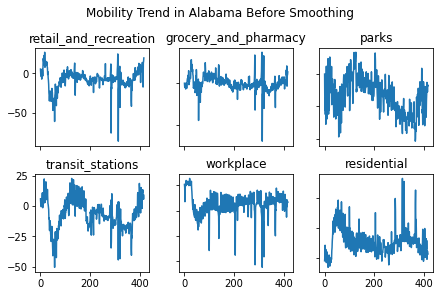

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,constrained_layout=True)
fig.suptitle('Mobility Trend in Alabama Before Smoothing')
x = range(0,len(mobility[mobility['sub_region_1']=='Alabama']))
y = mobility[mobility['sub_region_1']=='Alabama']
ax1.plot(x,y['state_avg_retail_and_recreation'])
ax2.plot(x,y['state_avg_grocery_and_pharmacy'])
ax3.plot(x,y['state_avg_parks'])
ax4.plot(x,y['state_avg_transit_stations'])
ax5.plot(x,y['state_avg_workplaces'])
ax6.plot(x,y['state_avg_residential'])

ax1.set_title('retail_and_recreation')
ax2.set_title('grocery_and_pharmacy')
ax3.set_title('parks')
ax4.set_title('transit_stations')
ax5.set_title('workplace')
ax6.set_title('residential')

for ax in fig.get_axes():
    ax.label_outer()


#Export data to Bigquery

In [ ]:
from pandas.io import gbq
case.to_gbq(destination_table='Mobility.Case_State',project_id='river-handbook-310114',if_exists='fail')
mobility.to_gbq(destination_table='Mobility.Mobility_State',project_id='river-handbook-310114',if_exists='fail')

1it [00:08,  8.80s/it]


In [ ]:
mobility.to_gbq(destination_table='Mobility.Mobility_State',project_id='river-handbook-310114',if_exists='fail')

1it [00:06,  6.59s/it]
